# Coffee Cooling Problem


In this notebook we will consider Newtown's cooling law in the context of a cup of coffee. We will define cooling by the following function:

$$\frac{dT}{dt} = -r(T - T_s)$$



We will explore rate of cooling based on varying time steps as well as the efficiencies of pre or post cooling using coffee creamer.

Our first step will be to create a function for a cooling step, in order to do so we will need to isolate the change in temperature (dT).

$$dT = -r(T - T_s)\times dt$$

We not create a function for a cooling step:

In [649]:
def cooling_step(coffee_T, ambient_T, r, dt):
    #r is cooling constant, dt is time step
    
    #Change in temperature
    Dt = (-1)*r*(coffee_T-ambient_T)*dt
    
    return coffee_T+Dt
    

First we well test with some initial parameters. Coffee temp: 100 C, Ambient temp: 0 C, r = 1, dt = 0.1

In [650]:
print(cooling_step(100,0,1,0.1))

90.0


In order to streamline further testing we will create a function which creates a data set for a simulation based on set parameters.

In [651]:
def generate_dataset(coffee_T, ambient_T, r, dt, time):
    num_steps = int(time/dt)
    results = []
    coffee_T = coffee_T
    
    for x in range(num_steps):
        results.append(coffee_T)
        coffee_T = cooling_step(coffee_T, ambient_T,r,dt)
        
    return results
        
    

We will create a function to plot the data, as well as a more broad function to do both at once, and finally a function to do both at once.

In [652]:
import matplotlib.pyplot as plt

def plot_cooling(temperature_data, dt, ambient_T,r=None,title='Coffee Cooling Over Time', figsize=(10, 6), end_temperature=None, ax=None):
    
    time_seconds = [i * dt for i in range(len(temperature_data))]

    # If no axis provided, create a new figure
    if ax is None:
        plt.figure(figsize=figsize)
        ax = plt.gca()
        show_plot = True
    else:
        show_plot = False

    ax.plot(time_seconds, temperature_data, linewidth=2)

    # Draw horizontal line and crossing marker at end_temperature if specified
    if end_temperature is not None:
        try:
            target_temp = float(end_temperature)
        except (TypeError, ValueError):
            target_temp = None
        if target_temp is not None:
            # horizontal target line
            ax.axhline(y=target_temp, color='red', linestyle='--', linewidth=2.5, label=f'Target: {target_temp}°C')

            # find crossing
            crossing_time = None
            for i in range(len(temperature_data) - 1):
                if temperature_data[i] >= target_temp and temperature_data[i + 1] <= target_temp:
                    t1, t2 = time_seconds[i], time_seconds[i + 1]
                    temp1, temp2 = temperature_data[i], temperature_data[i + 1]
                    # linear interpolation for more accurate crossing time
                    crossing_time = t1 + (target_temp - temp1) * (t2 - t1) / (temp2 - temp1)
                    break

            if crossing_time is not None:
                ax.axvline(x=crossing_time, color='green', linestyle=':', linewidth=2, label=f'Crossing at {crossing_time:.2f} mins.')
            else:
                print(f"No crossing: min {min(temperature_data):.2f}°C, max {max(temperature_data):.2f}°C, target {target_temp}°C")

            ax.legend()

    ax.set_xlabel('Time (minutes)')
    ax.set_ylabel('Temperature (°C)')
    ax.set_title(f'{title} (dt={dt}, r={r}, ambient T = {ambient_T}°C)')
    ax.grid(True, alpha=0.3)

    if show_plot:
        plt.show()


In [653]:
def run_trial(coffee_T, ambient_T, r, dt, length, end_temperature=None, title='Coffee Cooling Simulation'):
    print(f"Performing trial with coffee_T={coffee_T}°C, ambient_T={ambient_T}°C, r={r}, dt={dt}, length={length} mins.")
    
    results = generate_dataset(coffee_T, ambient_T, r, dt, length)
    plot_cooling(results, dt, ambient_T,r,end_temperature=end_temperature, title=title)


We will now run a trial with the parameters from above.

Performing trial with coffee_T=100°C, ambient_T=0°C, r=1, dt=0.1, length=5 mins.


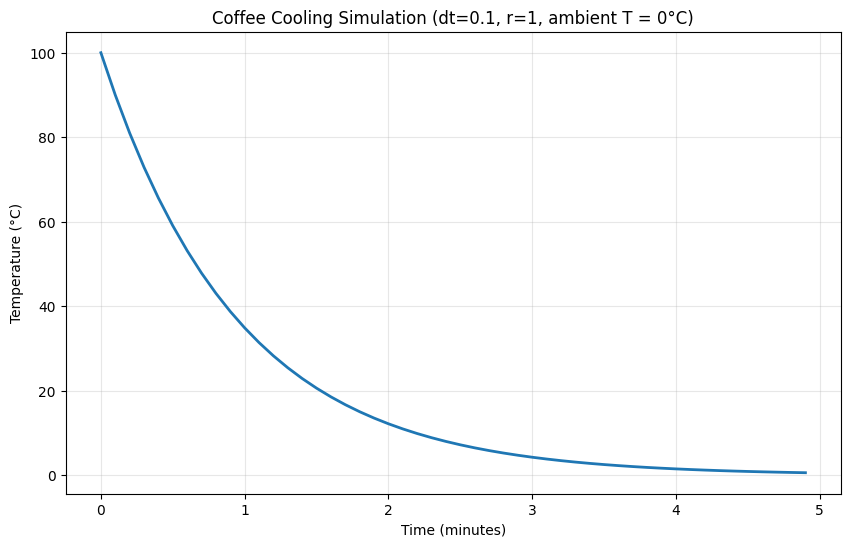

In [654]:
run_trial(100,0,1,0.1,5)

We will now run a simulation on a cup of coffee, we will use an r value of r = 0.03. Our initial coffee temp will be 87 C and our ambient temp will be 17 C. 

Performing trial with coffee_T=87°C, ambient_T=17°C, r=0.03, dt=0.1, length=100 mins.


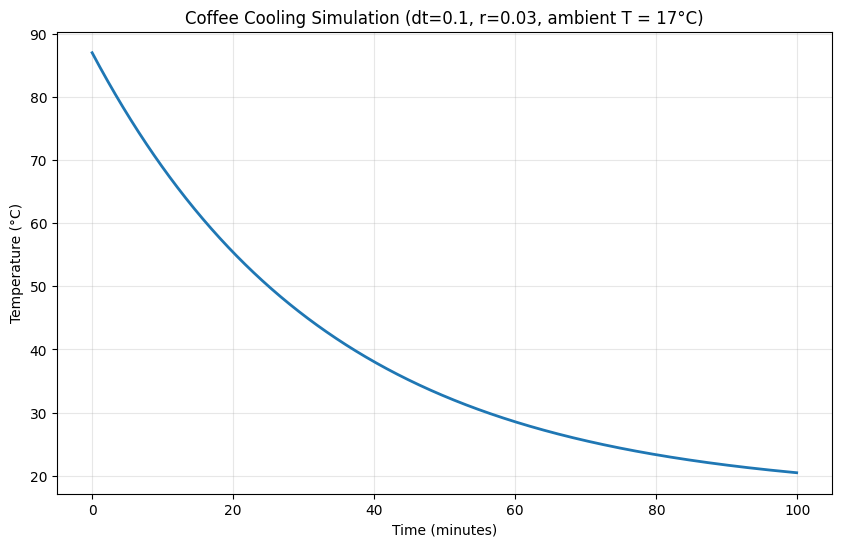

In [655]:
run_trial(87,17,0.03,.1,100)

We see an expected graph that represents geometric growth/decay. We use seconds, in this case 100, to demonstrate the real world application. 

To identify the units of r in newtown's law of cooling, we will do basic dimensional analysis.

## Dimensional Analysis

Newton's Law of Cooling: 

$$\frac{dT}{dt} = -r(T - T_{ambient})$$

$dT$ and $(T - T_{ambient})$ are Temperature.

$\frac{1}{dt}$ is $\frac{1}{time}$

Therefore r is also $\frac{1}{time}$

I originally assumed this was in seconds but was getting unrealistically quick temperature decay, this rate of cooling seems to be more consistent with minutes.

## Values for time step

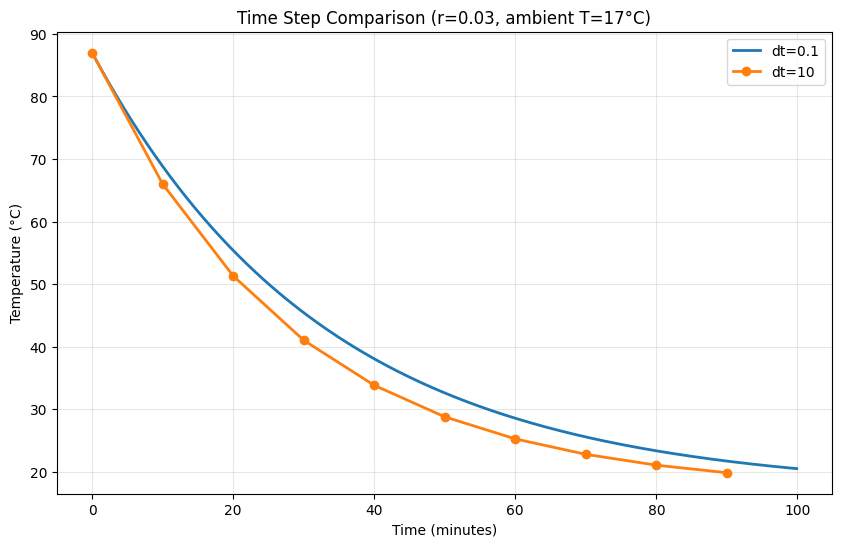

In [656]:
import matplotlib.pyplot as plt

# Parameters for both simulations
coffee_T = 87
ambient_T = 17
r = 0.03
length = 100

# Generate datasets with different time steps
dt1 = 0.1
dt2 = 10
results1 = generate_dataset(coffee_T, ambient_T, r, dt1, length)
results2 = generate_dataset(coffee_T, ambient_T, r, dt2, length)

# Plot both datasets on the same axes for direct comparison
plt.figure(figsize=(10, 6))

time1 = [i * dt1 for i in range(len(results1))]
time2 = [i * dt2 for i in range(len(results2))]

plt.plot(time1, results1, linewidth=2, label=f'dt={dt1}')
plt.plot(time2, results2, linewidth=2, marker='o', label=f'dt={dt2}')

plt.xlabel('Time (minutes)')
plt.ylabel('Temperature (°C)')
plt.title(f'Time Step Comparison (r={r}, ambient T={ambient_T}°C)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


We can see here that larger time step values create lack of precision as well as sheer inaccuracy. It makes sense that larger time steps will predict lower temperatures. Consider the difference between a shorter interval and a longer interval with the same difference in temperature (between the subject and it's surroundings). The rate of cooling is proportional to this difference. Because of this a larger interval will be using this relative difference for calculating temperature both near the beginning of the interval and the end of it.

This error will diminish as our time step approaches 0.

*Interesting note, it's possible to overshoot the target temperature with a large dt and have the graph show temperature increase.

## Adding Creamer

We assume that adding creamer to the coffee subtracts 5° C from the coffee regardless of initial temperature. Using this information we want to determine if it is more efficient to add the creamer immediately or to wait such that the resulting temperature after adding the creamer is at 75°C. In this scenario we will set

- Initial Coffee Temperature: 87°C
- Ambient Temperature: 17°C
- r = 0.03


We will run another trial at 82°C representing having put the creamer in immediately.

We will run one trial beginning at 87°C with a final temperature of 80° (so that when we add the creamer the final temperature is 75°C).

Performing trial with coffee_T=82°C, ambient_T=17°C, r=0.03, dt=0.1, length=10 mins.


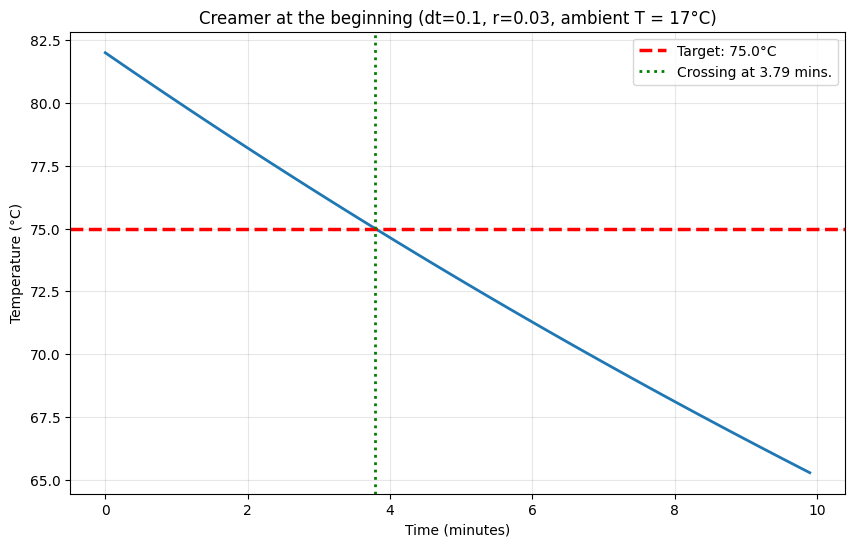

Performing trial with coffee_T=87°C, ambient_T=17°C, r=0.03, dt=0.1, length=10 mins.


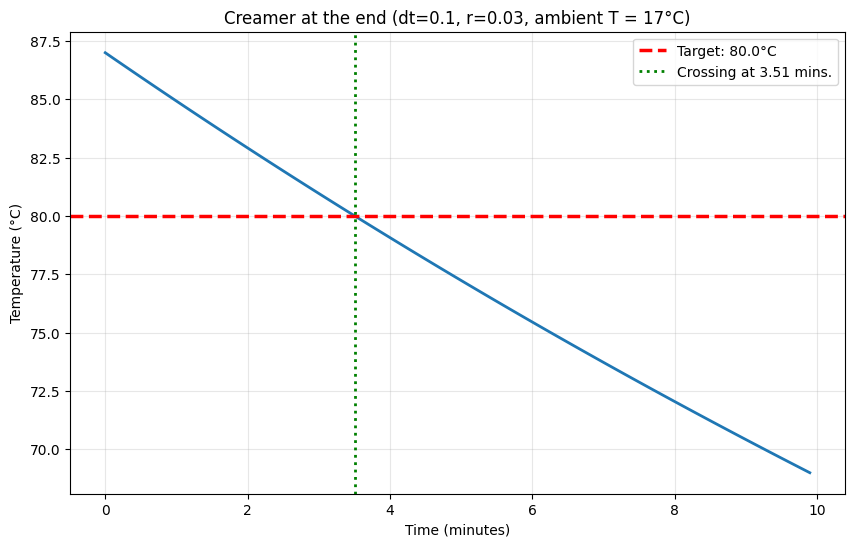

In [657]:
run_trial(82,17,0.03,0.1,10,end_temperature=75,title="Creamer at the beginning")
run_trial(87,17,0.03,0.1,10,end_temperature=80,title="Creamer at the end")

## Results

From the graphs above we see a non-negligible benefit to waiting to put the creamer in until after cooling has occured.

## Rate of cooling comparison

Plot both on same graph

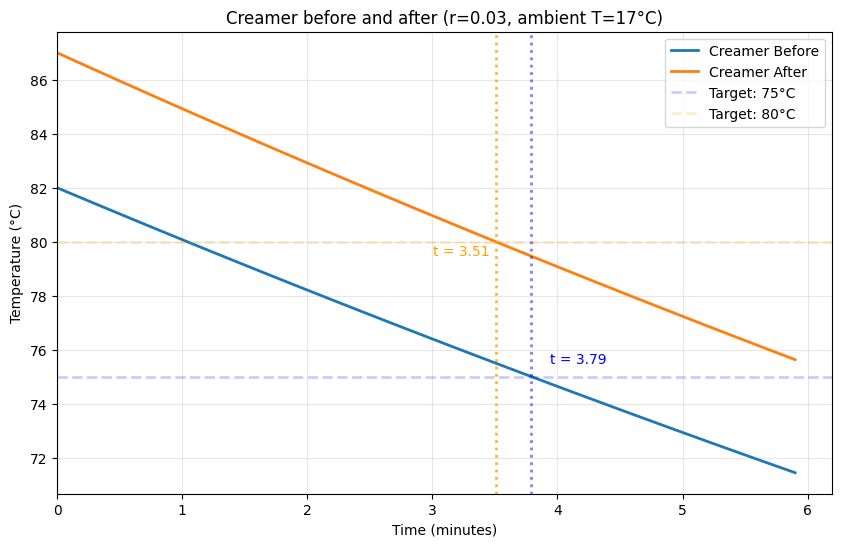

In [658]:
creamer_before = generate_dataset(82, 17, 0.03, .1, 6) #Target will be 75
creamer_after = generate_dataset(87, 17, 0.03, .1, 6) #Target will be 80

plt.figure(figsize=(10, 6))

time1 = [i * 0.1 for i in range(len(creamer_before))]
time2 = [i * 0.1 for i in range(len(creamer_after))]

plt.plot(time1, creamer_before, linewidth=2, label='Creamer Before')
plt.plot(time2, creamer_after, linewidth=2, label=f'Creamer After')

plt.axhline(y=75, color='blue', linestyle='--', linewidth=2, alpha=0.2, label='Target: 75°C')
plt.axhline(y=80, color='orange', linestyle='--', linewidth=2, alpha=0.2, label='Target: 80°C')

# Find crossing for creamer_before at 75°C
for i in range(len(creamer_before) - 1):
    if creamer_before[i] >= 75 and creamer_before[i + 1] <= 75:
        t1, t2 = time1[i], time1[i + 1]
        temp1, temp2 = creamer_before[i], creamer_before[i + 1]
        crossing_time_before = t1 + (75 - temp1) * (t2 - t1) / (temp2 - temp1)
        plt.axvline(x=crossing_time_before, color='blue', linestyle=':', linewidth=2, alpha=0.5)
        plt.text(crossing_time_before + 0.15, 75.5, f't = {crossing_time_before:.2f}', ha='left', color='blue', fontsize=10)
        break

# Find crossing for creamer_after at 80°C
for i in range(len(creamer_after) - 1):
    if creamer_after[i] >= 80 and creamer_after[i + 1] <= 80:
        t1, t2 = time2[i], time2[i + 1]
        temp1, temp2 = creamer_after[i], creamer_after[i + 1]
        crossing_time_after = t1 + (80 - temp1) * (t2 - t1) / (temp2 - temp1)
        plt.axvline(x=crossing_time_after, color='orange', linestyle=':', linewidth=2, alpha=0.8)
        plt.text(crossing_time_after - 0.50, 79.5, f't = {crossing_time_after:.2f}', ha='left', color='orange', fontsize=10)
        break

plt.xlabel('Time (minutes)')
plt.ylabel('Temperature (°C)')
plt.title(f'Creamer before and after (r={r}, ambient T={ambient_T}°C)')
plt.xlim(left=0)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
